In [1]:
from IPython.display import display, Image
import pandas as pd

df_train = pd.read_csv('./train.csv')
print(df_train.shape)
df_train.head()

#ir(df_train)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
# 'datetime' 컬럼을 datetime 자료형으로 변환 (컬럼명이 'datetime'이라고 가정)
df_train['datetime'] = pd.to_datetime(df_train['datetime'])

# 연, 월, 일, 시, 분, 초를 추출하여 새로운 컬럼 생성
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour
df_train['minute'] = df_train['datetime'].dt.minute
df_train['second'] = df_train['datetime'].dt.second

# 새로운 컬럼이 생성된 데이터프레임을 확인
display(df_train.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


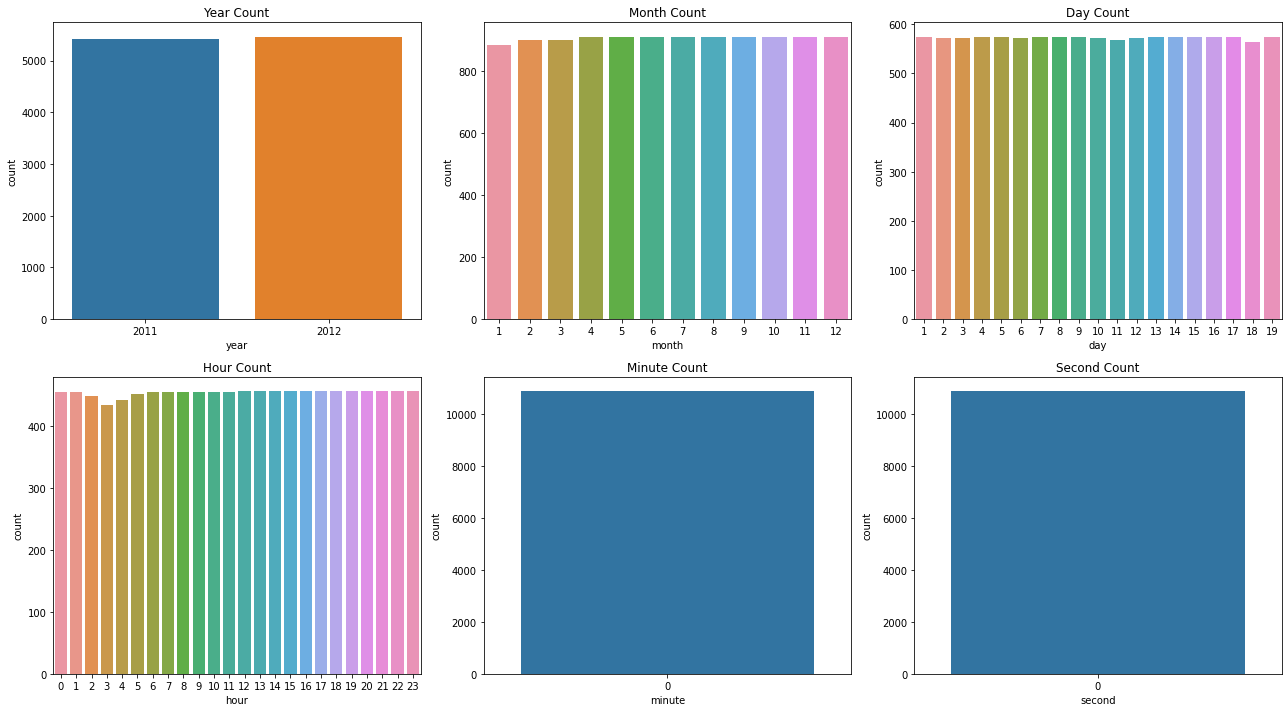

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯 생성 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# countplot 생성
sns.countplot(x='year', data=df_train, ax=axes[0, 0])
axes[0, 0].set_title('Year Count')

sns.countplot(x='month', data=df_train, ax=axes[0, 1])
axes[0, 1].set_title('Month Count')

sns.countplot(x='day', data=df_train, ax=axes[0, 2])
axes[0, 2].set_title('Day Count')

sns.countplot(x='hour', data=df_train, ax=axes[1, 0])
axes[1, 0].set_title('Hour Count')

sns.countplot(x='minute', data=df_train, ax=axes[1, 1])
axes[1, 1].set_title('Minute Count')

sns.countplot(x='second', data=df_train, ax=axes[1, 2])
axes[1, 2].set_title('Second Count')

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

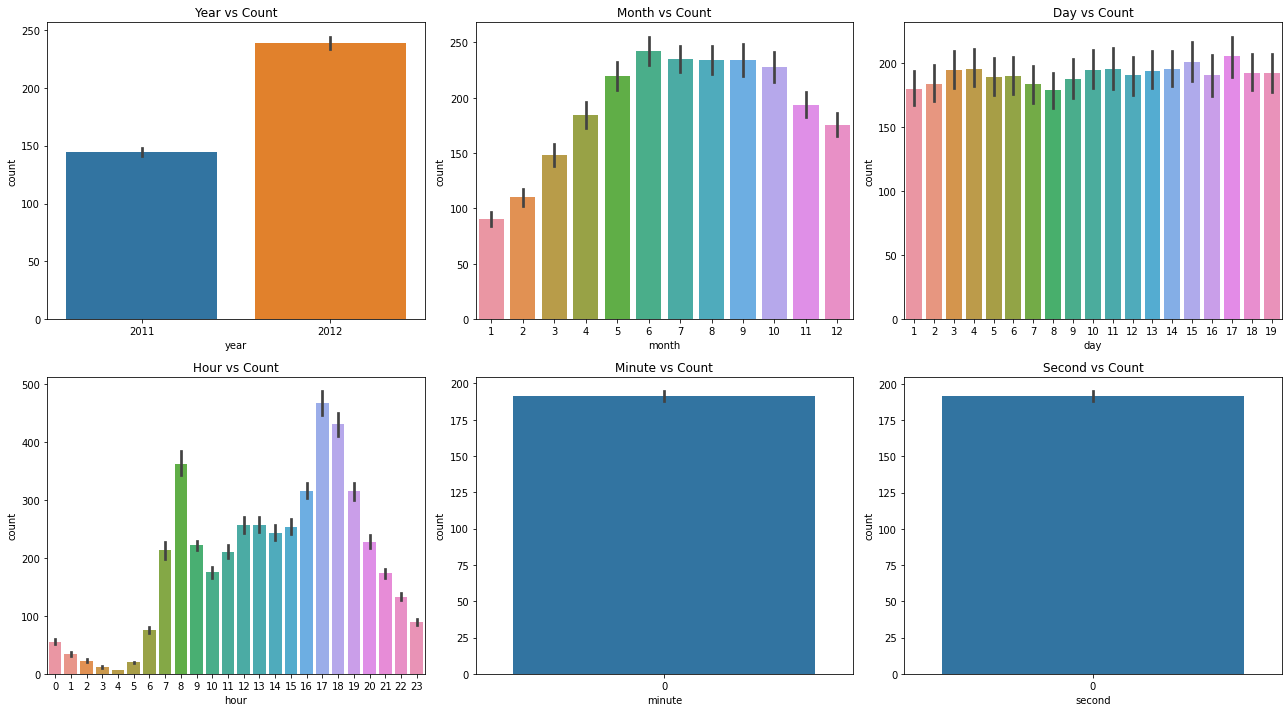

In [4]:
# 서브플롯 생성 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# countplot 생성
sns.barplot(x='year', y='count', data=df_train, ax=axes[0, 0])
axes[0, 0].set_title('Year vs Count')

sns.barplot(x='month', y='count', data=df_train, ax=axes[0, 1])
axes[0, 1].set_title('Month vs Count')

sns.barplot(x='day', y='count', data=df_train, ax=axes[0, 2])
axes[0, 2].set_title('Day vs Count')

sns.barplot(x='hour', y='count', data=df_train, ax=axes[1, 0])
axes[1, 0].set_title('Hour vs Count')

sns.barplot(x='minute', y='count', data=df_train, ax=axes[1, 1])
axes[1, 1].set_title('Minute vs Count')

sns.barplot(x='second', y='count', data=df_train, ax=axes[1, 2])
axes[1, 2].set_title('Second vs Count')

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

## count plot과 barplot 결과 연, 달, 날, 시 는 count에 영향을 줄 것 같긴 하지만, 분과 초는 아무런 관련이 없을 것 같다.

### 또 casual과 registered는 count와 직접적인 연관이 있음 (count에 casual과 registered가 포함됨)

In [5]:
X = df_train[['year', 'month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']].values

y = df_train['count'].values

print("X와 y로 data, target 찢기")

X와 y로 data, target 찢기


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("슝=3")

슝=3


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np


mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

rmse

141.22807813517184

In [9]:
mse

19945.3700537542

Temp

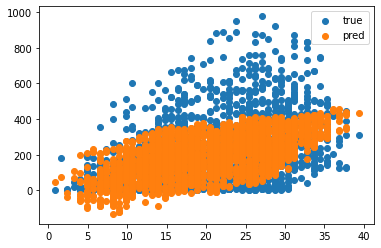

In [10]:
plt.scatter(X_test[:, 8], y_test, label="true")
plt.scatter(X_test[:, 8], predictions, label="pred")
plt.legend()
plt.show()

humidity

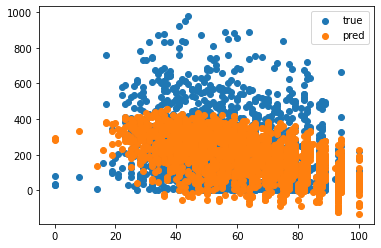

In [11]:
plt.scatter(X_test[:, 10], y_test, label="true")
plt.scatter(X_test[:, 10], predictions, label="pred")
plt.legend()
plt.show()